<a href="https://colab.research.google.com/github/CristianDGuerreroA/ProyectoFinalInteligentes2/blob/main/PruebasProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
import pandas as pd
import seaborn as sb

#Cargar datos de ejemplo
import tensorflow as tf 

## Import la API keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input, Conv2D, MaxPool2D,Reshape,Dense,Flatten,Dropout
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def cargarDatos(fase,categorias,limite):
    imagenesCargadas=[]
    etiquetas=[]
    valorEsperado=[]
    for categoria in range(0,len(categorias)):
        for idImagen in range(0,limite):
            ruta=fase+str(categoria + 1)+"/"+str(categorias[categoria])+"-"+str(idImagen + 1)+".jpg"
            print(ruta)
            imagen=cv2.imread(ruta,0)
            if imagen is not None:
              imagen=imagen.flatten()
              imagen=imagen/255
              imagenesCargadas.append(imagen)
              etiquetas.append(categorias[categoria])
              print('Las etiquetas son: ',categorias[categoria])
            else: 
              print('F papu no cargó')
            probabilidades=np.zeros(len(categorias))
            probabilidades[categoria]=1
            valorEsperado.append(probabilidades)
    imagenesEntrenamiento=np.array(imagenesCargadas)
    etiquetasEntrenamiento=np.array(etiquetas)
    valoresEsperados=np.array(valorEsperado)
    return imagenesEntrenamiento,etiquetasEntrenamiento,valoresEsperados

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


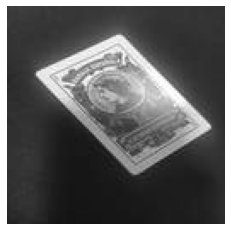

In [ ]:
import cv2 
from matplotlib import pyplot as plt
 
path = '/content/drive/MyDrive/Proyecto_int2/Imagenes_baraja/4/As_de_oros-1.jpg'

imagen=cv2.imread(path,0)

if imagen is None:
  print("error al cargar la imagen")
else:
  plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()

In [ ]:
img_size=128
#Numero de neuronas de la cnn
img_size_flat=img_size*img_size
#Parametrizar la forma de imagenes
num_chanels=1
#RGB, HSV -> num_chanels=3
img_shape=(img_size,img_size,num_chanels)
clases = ['As_de_bastos','As_de_copas','As_de_espadas','As_de_oros',
              'Caballo_de_bastos','Caballo_de_copas','Caballo_de_espadas','Caballo_de_oros',
              'Cinco_de_bastos','Cinco_de_copas','Cinco_de_espadas','Cinco_de_oros',
              'Cuatro_de_bastos','Cuatro_de_copas','Cuatro_de_espadas','Cuatro_de_oros',
              'Dos_de_bastos','Dos_de_copas','Dos_de_espadas','Dos_de_oros',
              'Rey_de_bastos','Rey_de_copas','Rey_de_espadas','Rey_de_oros',
              'Seis_de_bastos','Seis_de_copas','Seis_de_espadas','Seis_de_oros',
              'Siete_de_bastos','Siete_de_copas','Siete_de_espadas','Siete_de_oros',
              'Sota_de_bastos','Sota_de_copas','Sota_de_espadas','Sota_de_oros',
              'Tres_de_bastos','Tres_de_copas','Tres_de_espadas','Tres_de_oros'
              ]
limiteImagenesPrueba=60
imagenes,etiquetas,probabilidades=cargarDatos("/content/drive/MyDrive/Proyecto_int2/Imagenes_baraja/",clases,limiteImagenesPrueba)

/content/drive/MyDrive/Proyecto_int2/Imagenes_baraja/1/As_de_bastos-1.jpg
Las etiquetas son:  As_de_bastos
/content/drive/MyDrive/Proyecto_int2/Imagenes_baraja/1/As_de_bastos-2.jpg
Las etiquetas son:  As_de_bastos
/content/drive/MyDrive/Proyecto_int2/Imagenes_baraja/1/As_de_bastos-3.jpg
Las etiquetas son:  As_de_bastos
/content/drive/MyDrive/Proyecto_int2/Imagenes_baraja/1/As_de_bastos-4.jpg
Las etiquetas son:  As_de_bastos
/content/drive/MyDrive/Proyecto_int2/Imagenes_baraja/1/As_de_bastos-5.jpg
Las etiquetas son:  As_de_bastos
/content/drive/MyDrive/Proyecto_int2/Imagenes_baraja/1/As_de_bastos-6.jpg
Las etiquetas son:  As_de_bastos
/content/drive/MyDrive/Proyecto_int2/Imagenes_baraja/1/As_de_bastos-7.jpg
Las etiquetas son:  As_de_bastos
/content/drive/MyDrive/Proyecto_int2/Imagenes_baraja/1/As_de_bastos-8.jpg
Las etiquetas son:  As_de_bastos
/content/drive/MyDrive/Proyecto_int2/Imagenes_baraja/1/As_de_bastos-9.jpg
Las etiquetas son:  As_de_bastos
/content/drive/MyDrive/Proyecto_int2/

In [ ]:
model=Sequential()
#Capa entrada
model.add(InputLayer(input_shape=(img_size_flat,)))
#Reformar imagen
model.add(Reshape(img_shape))

#Capas convolucionales
model.add(Conv2D(kernel_size=5,strides=1,filters=16,padding='same',activation='relu',name='capa_convolucion_1'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(kernel_size=5,strides=1,filters=36,padding='same',activation='relu',name='capa_convolucion_2'))
model.add(MaxPooling2D(pool_size=2,strides=2))

#Aplanar imagen
model.add(Flatten())
#Capa densa
model.add(Dense(128,activation='relu'))


#Capa salida
model.add(Dense(len(clases),activation='softmax'))

In [ ]:
#Compilacion del modelo
optimizador=Adam(learning_rate=1e-3)
model.compile('Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [ ]:
model.fit(x=imagenes,y=probabilidades,epochs=10,batch_size=100)
limiteImagenesPrueba=20
imagenesPrueba,etiquetasPrueba,probabilidadesPrueba=cargarDatos('/content/drive/MyDrive/Proyecto_int2/Test_images/',clases,limiteImagenesPrueba)
resultados=model.evaluate(x=imagenesPrueba,y=probabilidadesPrueba)
print("{0}: {1:.2%}".format(model.metrics_names[1], resultados[1]))
#Carpeta y nombre del archivo como se almacenará el modelo
nombreArchivo='models/modeloReconocimientoBarajaEsp.keras'
model.save(nombreArchivo)
model.summary()


Epoch 1/10
24/24 [==============================] - 59s 2s/step - loss: 0.0414 - accuracy: 0.9658
Epoch 2/10
24/24 [==============================] - 56s 2s/step - loss: 0.0415 - accuracy: 0.9708
Epoch 3/10
24/24 [==============================] - 58s 2s/step - loss: 0.0406 - accuracy: 0.9746
Epoch 4/10
24/24 [==============================] - 56s 2s/step - loss: 0.0375 - accuracy: 0.9746
Epoch 5/10
24/24 [==============================] - 58s 2s/step - loss: 0.0401 - accuracy: 0.9725
Epoch 6/10
24/24 [==============================] - 58s 2s/step - loss: 0.0397 - accuracy: 0.9742
Epoch 7/10
24/24 [==============================] - 56s 2s/step - loss: 0.0437 - accuracy: 0.9729
Epoch 8/10
24/24 [==============================] - 58s 2s/step - loss: 0.0378 - accuracy: 0.9754
Epoch 9/10
24/24 [==============================] - 56s 2s/step - loss: 0.0387 - accuracy: 0.9754
Epoch 10/10
24/24 [==============================] - 58s 2s/step - loss: 0.0376 - accuracy: 0.9771
/content/drive/MyDr

In [ ]:
from tensorflow.python.keras.models import load_model
import numpy as np
import cv2

class prediccion():
    """
    Carga el modelo de la red neuronal de la ruta especificada
    """
    def __init__(self):
        self.rutaModelo="models/modeloReconocimientoBarajaEsp.keras"
        self.model=load_model(self.rutaModelo)
        self.width=128
        self.heigth=128

    def predecir(self,imagen):
        """
            Toma la imagen de entrada y realiza el proceso de predicción
        """
        imagen=cv2.resize(imagen,(self.width,self.heigth))
        imagen=imagen.flatten()
        imagen=np.array(imagen)
        imagenNormalizada=imagen/255
        pruebas=[]
        pruebas.append(imagenNormalizada)
        imagenesAPredecir=np.array(pruebas)
        predicciones=self.model.predict(x=imagenesAPredecir)
        claseMayorValor=np.argmax(predicciones,axis=1)
        print('Predicciones',predicciones)
        print (claseMayorValor)
        return claseMayorValor[0]


Predicciones [[1.15259615e-08 7.63712382e-09 3.16309451e-10 9.99149561e-01
  7.77381715e-09 2.87358031e-08 4.86356155e-09 2.21648830e-13
  3.72652685e-05 2.76965164e-13 6.38467682e-11 7.69820937e-04
  7.22641005e-07 2.03636118e-11 1.76682020e-11 7.44813544e-10
  1.36110359e-08 1.00755406e-05 7.47239710e-06 1.28370503e-14
  2.40583820e-09 6.81196544e-10 1.10520944e-07 5.01816970e-08
  1.65478796e-05 9.98306518e-07 1.13016631e-06 2.01289402e-11
  3.32465833e-10 1.15889759e-06 5.55015478e-10 2.96544385e-07
  9.15008954e-12 3.86466127e-06 4.87843377e-10 4.26372757e-11
  5.71797841e-07 1.22295569e-08 2.83848001e-10 2.64606882e-07]]
[3]
La imagen cargada es  As_de_oros


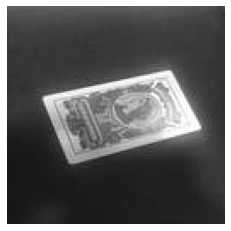

In [ ]:
categorias=['As_de_bastos','As_de_copas','As_de_espadas','As_de_oros',
              'Caballo_de_bastos','Caballo_de_copas','Caballo_de_espadas','Caballo_de_oros',
              'Cinco_de_bastos','Cinco_de_copas','Cinco_de_espadas','Cinco_de_oros',
              'Cuatro_de_bastos','Cuatro_de_copas','Cuatro_de_espadas','Cuatro_de_oros',
              'Dos_de_bastos','Dos_de_copas','Dos_de_espadas','Dos_de_oros',
              'Rey_de_bastos','Rey_de_copas','Rey_de_espadas','Rey_de_oros',
              'Seis_de_bastos','Seis_de_copas','Seis_de_espadas','Seis_de_oros',
              'Siete_de_bastos','Siete_de_copas','Siete_de_espadas','Siete_de_oros',
              'Sota_de_bastos','Sota_de_copas','Sota_de_espadas','Sota_de_oros',
              'Tres_de_bastos','Tres_de_copas','Tres_de_espadas','Tres_de_oros']
reconocimiento=prediccion()
imagenPrueba=cv2.imread('/content/drive/MyDrive/Proyecto_int2/Test_images/4/As_de_oros-11.jpg',0)
#print(imagenPrueba)
indiceCategoria=reconocimiento.predecir(imagenPrueba)
print("La imagen cargada es ",categorias[indiceCategoria])

imagen = cv2.imread('/content/drive/MyDrive/Proyecto_int2/Test_images/4/As_de_oros-11.jpg',0)

if imagen is None:
  print('error al cargar la imagen')
else:
  plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()
cv2.destroyAllWindows()

Predicciones [[1.47410481e-06 1.65921283e-05 1.30195967e-05 2.12847408e-06
  1.15823213e-05 4.71635467e-05 5.10794740e-09 3.62123547e-12
  1.22572779e-08 4.39895409e-08 9.81229732e-07 2.76217822e-08
  1.65062858e-07 1.16918564e-07 2.96423259e-08 1.19163509e-13
  9.88339988e-09 4.36762321e-10 3.44175132e-05 7.82805287e-09
  1.08170898e-05 9.99708235e-01 1.06982355e-07 5.34963101e-06
  1.36801532e-06 1.72361503e-08 2.39327513e-09 2.16212026e-08
  4.15517787e-10 4.33192788e-08 8.82141758e-05 3.87780391e-14
  1.87960359e-05 2.26291093e-08 2.33620699e-06 3.56982994e-08
  3.18910061e-05 2.72604206e-09 4.91578703e-06 1.15126440e-07]]
[21]
La imagen cargada es  Rey_de_copas


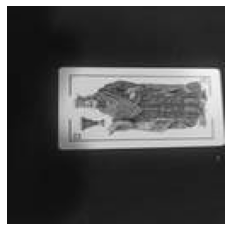

In [ ]:
categorias=['As_de_bastos','As_de_copas','As_de_espadas','As_de_oros',
              'Caballo_de_bastos','Caballo_de_copas','Caballo_de_espadas','Caballo_de_oros',
              'Cinco_de_bastos','Cinco_de_copas','Cinco_de_espadas','Cinco_de_oros',
              'Cuatro_de_bastos','Cuatro_de_copas','Cuatro_de_espadas','Cuatro_de_oros',
              'Dos_de_bastos','Dos_de_copas','Dos_de_espadas','Dos_de_oros',
              'Rey_de_bastos','Rey_de_copas','Rey_de_espadas','Rey_de_oros',
              'Seis_de_bastos','Seis_de_copas','Seis_de_espadas','Seis_de_oros',
              'Siete_de_bastos','Siete_de_copas','Siete_de_espadas','Siete_de_oros',
              'Sota_de_bastos','Sota_de_copas','Sota_de_espadas','Sota_de_oros',
              'Tres_de_bastos','Tres_de_copas','Tres_de_espadas','Tres_de_oros']
reconocimiento=prediccion()
imagenPrueba=cv2.imread('/content/drive/MyDrive/Proyecto_int2/Test_images/22/Rey_de_copas-19.jpg',0)
#print(imagenPrueba)
indiceCategoria=reconocimiento.predecir(imagenPrueba)
print("La imagen cargada es ",categorias[indiceCategoria])

imagen = cv2.imread('/content/drive/MyDrive/Proyecto_int2/Test_images/22/Rey_de_copas-19.jpg',0)

if imagen is None:
  print('error al cargar la imagen')
else:
  plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()
cv2.destroyAllWindows()